In [1]:
import matplotlib.pyplot as plt
import pyvista as pv
from pyvista import examples
import numpy as np
from PIL import Image
import cv2
import math

In [2]:
%matplotlib inline

# Intersection

C:\Users\there\AppData\Local\Temp\ipykernel_18408\4185363603.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dst = np.zeros((100,100),dtype=np.int)


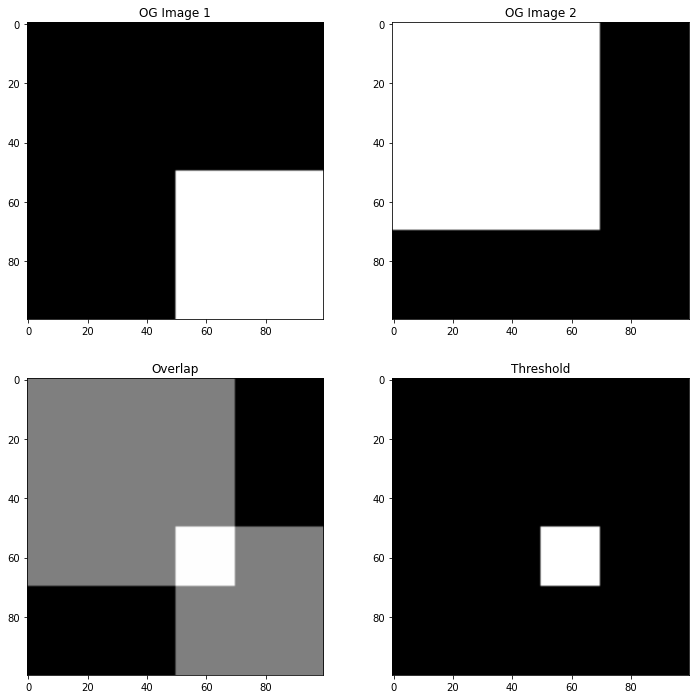

In [87]:
#our target area (the black background)
dst = np.zeros((100,100),dtype=np.int)
src1 = dst.copy() 
src2 = dst.copy()
src1[50:,50:] = 1 #fake of first translated image (row/col 50-end)
src2[:70,:70] = 1 #fake of second translated image (row/col 0-70)

overlap = src1+src2 #sum of both *element-wise*

cv2.imwrite('a.png', src1*255) #opencv likes it's grey images span from 0-255
cv2.imwrite('b.png', src2*255) #...
cv2.imwrite('c.png', overlap*127) #here vals 0-2, *127 gives (almost) 255 again

src1_img = cv2.imread('a.png')
src2_img = cv2.imread('b.png')
overlap_img = cv2.imread('c.png')

th, dst = cv2.threshold(overlap_img, 127, 255, cv2.THRESH_BINARY)

titles = ['OG Image 1','OG Image 2','Overlap','Threshold']
images = [src1_img, src2_img, overlap_img, dst]

fig, ax = plt.subplots(
    nrows=2, ncols=2, figsize = (12,12)
)

ax[0, 0].imshow(src1_img)
ax[0, 0].title.set_text('OG Image 1')

ax[0, 1].imshow(src2_img)
ax[0, 1].title.set_text('OG Image 2')

ax[1, 0].imshow(overlap_img)
ax[1, 0].title.set_text('Overlap')

ax[1, 1].imshow(dst)
ax[1, 1].title.set_text('Threshold')


In [3]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [4]:
def angle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

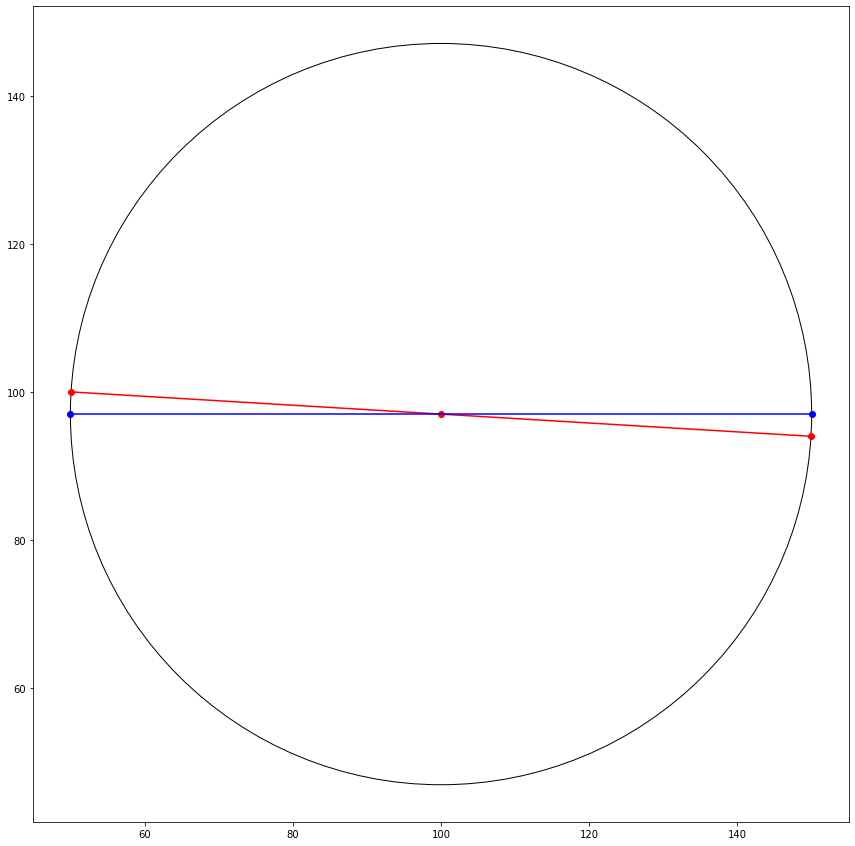

In [221]:
p1 = (50, 100)
p2 = (150, 94)

center = ((p2[0]+p1[0])/2, (p1[1]+p2[1])/2)

circleRad = math.sqrt(pow((p1[0] - center[0]), 2) + pow((p1[1] - center[1]), 2))
p3 = (center[0] - circleRad, center[1])
p4 = (center[0] + circleRad, center[1])

circle1 = plt.Circle((center[0], center[1]), circleRad, fill=False)

angle1 = angle(p1, center, p3)
rotP1 = rotate(center, p1, math.radians(angle1))

angle2 = angle(p2, center, p4)
rotP2 = rotate(center, p2, math.radians(angle1))

x_values = [p1[0], p2[0]]
y_values = [p1[1], p2[1]]

rotX_values = [rotP1[0], rotP2[0]]
rotY_values = [rotP1[1], rotP2[1]]

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect( 1 )
ax.add_patch(circle1)


plt.plot(x_values, y_values, 'r')
plt.plot(x_values, y_values, 'ro')
plt.plot(center[0], center[1], 'ro')
plt.plot(rotX_values, rotY_values, 'b')
plt.plot(rotX_values, rotY_values, 'bo')


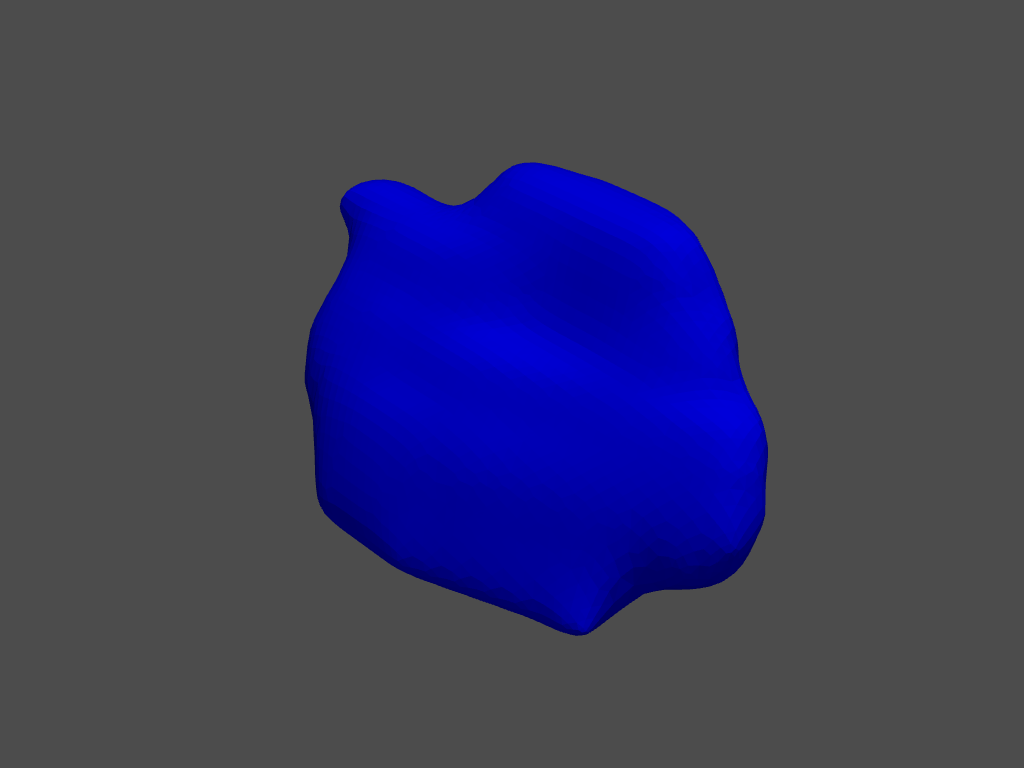

In [15]:
synapse_path = "./paired synapse-vesicle meshes/Synapse 408.stl"
vesicle_path = "./paired synapse-vesicle meshes/Vesicle 631.stl"

sy_reader = pv.get_reader(synapse_path)
ves_reader = pv.get_reader(vesicle_path)

synapse = sy_reader.read()
vesicle = ves_reader.read()

p = pv.Plotter(off_screen=True)

# == SET INITIAL POSITIONS ==
p1 = (synapse.center)
X, Y, Z = p1
p2 = (vesicle.center)
_X, _Y, _Z = p2

synapseOrigin = (0 - X, 0 - Y, 0 - Z)
vesicleOrigin = (0 - _X, 0 - _Y, 0 - _Z)

p.add_mesh(synapse, color="Blue")
# p.add_mesh(vesicle, color="Red")

# p.camera_position = 'xy'
# p.camera.SetParallelProjection(True)
# p.camera.focal_point = center
# camScale = p.camera.parallel_scale

p.show()

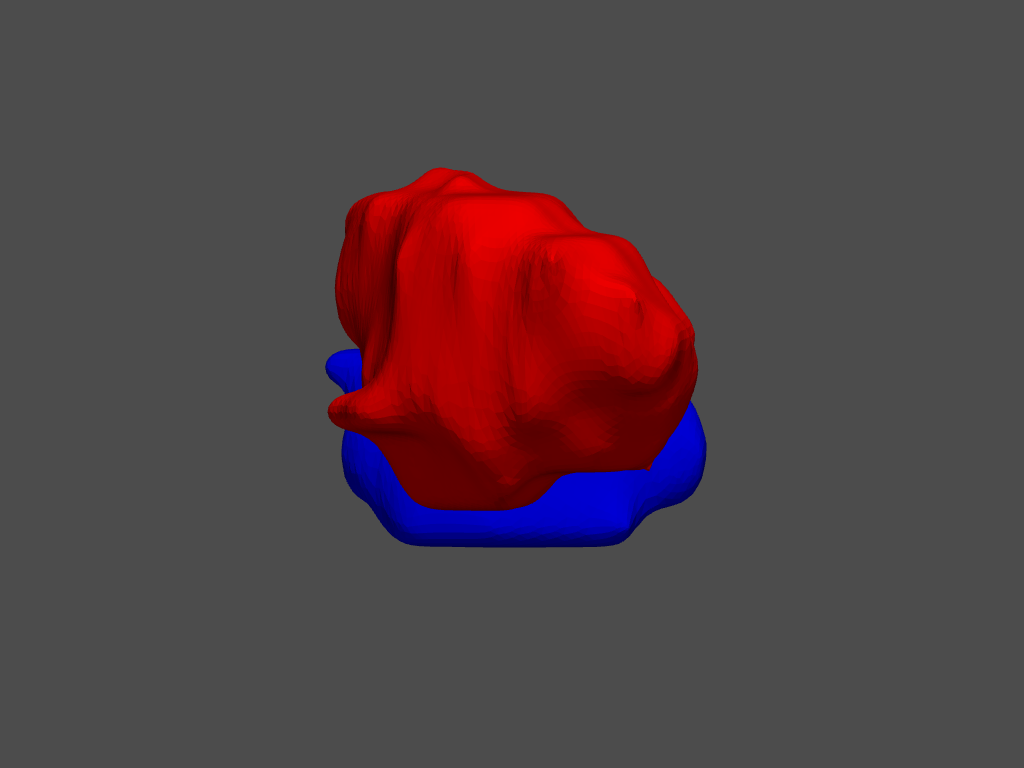

In [6]:
synapse_path = "./paired synapse-vesicle meshes/Synapse 408.stl"
vesicle_path = "./paired synapse-vesicle meshes/Vesicle 631.stl"

sy_reader = pv.get_reader(synapse_path)
ves_reader = pv.get_reader(vesicle_path)

synapse = sy_reader.read()
vesicle = ves_reader.read()

p = pv.Plotter(off_screen=True)

# == SET INITIAL POSITIONS ==
p1 = (synapse.center)
X, Y, Z = p1
p2 = (vesicle.center)
_X, _Y, _Z = p2

synapseOrigin = (0 - X, 0 - Y, 0 - Z)
vesicleOrigin = (0 - _X, 0 - _Y, 0 - _Z)

# == ROTATE MESHES TO BE IN LINE ==

center = ((p2[0]+p1[0])/2, (p1[1]+p2[1])/2, (p1[2]+p2[2])/2)
circleRad = math.sqrt(pow((p1[0] - center[0]), 2) + pow((p1[1] - center[1]), 2))
p3 = (center[0] - circleRad, center[1])
p4 = (center[0] + circleRad, center[1])

angle1 = angle(p1, center, p3)
angle2 = 180 - angle1

synapseRot = synapse.rotate_z(angle1, center, inplace=True)
vesicleRot = vesicle.rotate_z(angle1, center, inplace=True)

p.add_mesh(synapseRot, color="Blue")
p.add_mesh(vesicleRot, color="Red")

# == PROJECT TO PLANE ==

normal = (1, 0, 0)
sy_projected = synapseRot.project_points_to_plane(origin=center, normal=normal)
ves_projected = vesicleRot.project_points_to_plane(origin=center, normal=normal)

# p.add_mesh(sy_projected, color = 'Blue', show_scalar_bar=False)
# p.add_mesh(ves_projected, color = 'Red', show_scalar_bar=False)

# == CAMERA SETTINGS ==
p.camera_position = 'yz'
p.camera.SetParallelProjection(True)
p.camera.focal_point = center
camScale = p.camera.parallel_scale

p.show()

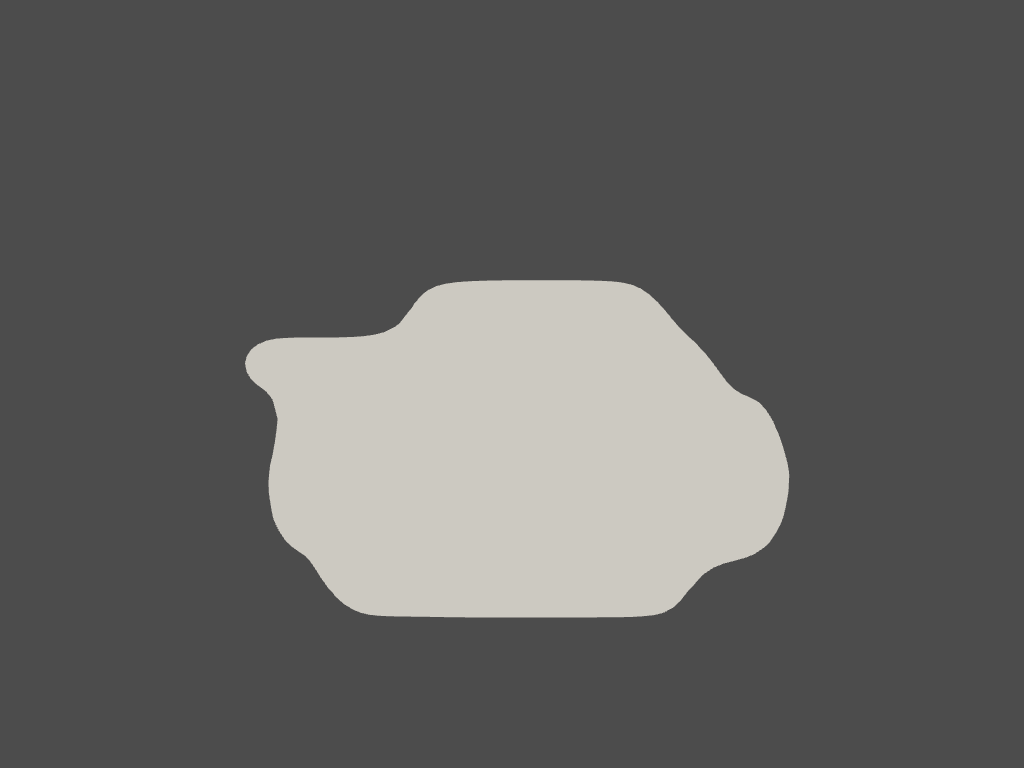

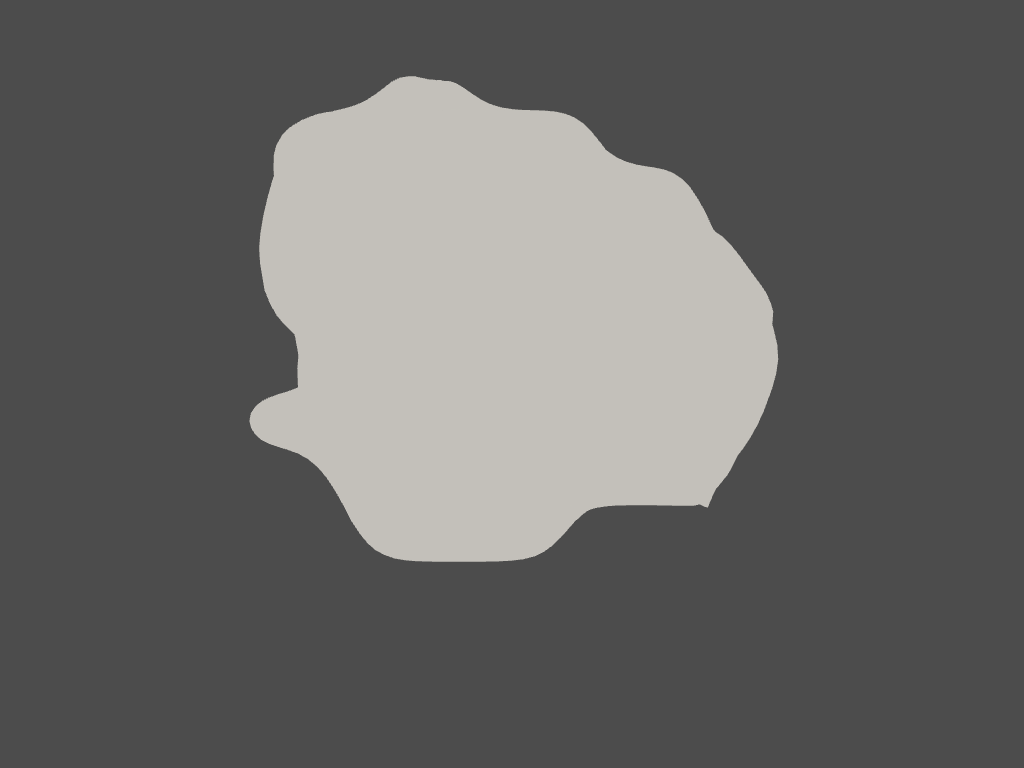

In [120]:
synPlot = pv.Plotter(off_screen=True)
vesPlot = pv.Plotter(off_screen=True)

synPlot.add_mesh(sy_projected, show_scalar_bar=False)
vesPlot.add_mesh(ves_projected, show_scalar_bar=False)

# == CAMERA SETTINGS ==
synPlot.camera_position = 'yz'
synPlot.camera.SetParallelProjection(True)
synPlot.camera.focal_point = center
synPlot.camera.parallel_scale = camScale

vesPlot.camera_position = 'yz'
vesPlot.camera.SetParallelProjection(True)
vesPlot.camera.focal_point = center
vesPlot.camera.parallel_scale = camScale

synPlot.show(screenshot='airplane.png')
vesPlot.show()

In [5]:
def SynVesPlot(synapsePath, vesiclePath):
    synapse_name = (synapsePath.split("/")[-1]).split(".")[0]
    vesicle_name = (vesiclePath.split("/")[-1]).split(".")[0]
    
    sy_reader = pv.get_reader(synapsePath)
    ves_reader = pv.get_reader(vesiclePath)

    synapse = sy_reader.read()
    vesicle = ves_reader.read()

    p = pv.Plotter(off_screen=True)

    # == SET INITIAL POSITIONS ==
    p1 = (synapse.center)
    X, Y, Z = p1
    p2 = (vesicle.center)
    _X, _Y, _Z = p2

    synapseOrigin = (0 - X, 0 - Y, 0 - Z)
    vesicleOrigin = (0 - _X, 0 - _Y, 0 - _Z)

    # == ROTATE MESHES TO BE IN LINE ==

    center = ((p2[0]+p1[0])/2, (p1[1]+p2[1])/2, (p1[2]+p2[2])/2)
    circleRad = math.sqrt(pow((p1[0] - center[0]), 2) + pow((p1[1] - center[1]), 2))
    p3 = (center[0] - circleRad, center[1])
    p4 = (center[0] + circleRad, center[1])

    angle1 = angle(p1, center, p3)
    angle2 = 180 - angle1

    synapseRot = synapse.rotate_z(angle1, center, inplace=True)
    vesicleRot = vesicle.rotate_z(angle1, center, inplace=True)

    # == PROJECT TO PLANE ==

    normal = (1, 0, 0)
    sy_projected = synapseRot.project_points_to_plane(origin=center, normal=normal)
    ves_projected = vesicleRot.project_points_to_plane(origin=center, normal=normal)

    p.add_mesh(sy_projected, color = 'Blue', show_scalar_bar=False)
    p.add_mesh(ves_projected, color = 'Red', show_scalar_bar=False)

    # == CAMERA SETTINGS ==
    p.camera_position = 'yz'
    p.camera.SetParallelProjection(True)
    p.camera.focal_point = center
    camScale = p.camera.parallel_scale
    
    # == NEW PLOTS ==
    
    synPlot = pv.Plotter(off_screen=True)
    vesPlot = pv.Plotter(off_screen=True)

    synPlot.add_mesh(sy_projected, show_scalar_bar=False)
    vesPlot.add_mesh(ves_projected, show_scalar_bar=False)

    # == CAMERA SETTINGS ==
    synPlot.camera_position = 'yz'
    synPlot.camera.SetParallelProjection(True)
    synPlot.camera.focal_point = center
    synPlot.camera.parallel_scale = camScale

    vesPlot.camera_position = 'yz'
    vesPlot.camera.SetParallelProjection(True)
    vesPlot.camera.focal_point = center
    vesPlot.camera.parallel_scale = camScale

    synImgName = '{}.png'.format(synapse_name)
    vesImgName = '{}.png'.format(vesicle_name)
    
    synPlot.show(screenshot=synImgName);
    vesPlot.show(screenshot=vesImgName);
    
    cv2.imwrite(synImgName, synPlot.image)
    cv2.imwrite(vesImgName, vesPlot.image)
    
    return(synPlot, vesPlot, synImgName, vesImgName)

C:\Users\there\anaconda3\lib\site-packages\pyvista\plotting\plotting.py:5424: UserWarning: 
Set `jupyter_backend` backend to `"none"` to take a screenshot within a notebook environment.
  warnings.warn(
C:\Users\there\anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


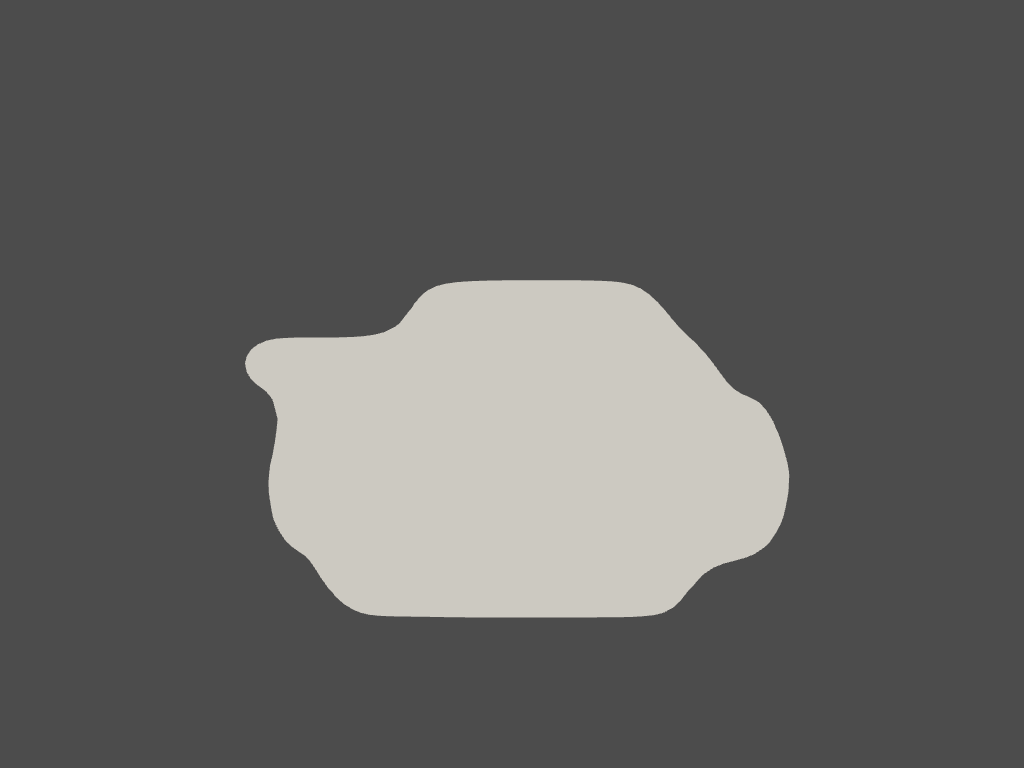

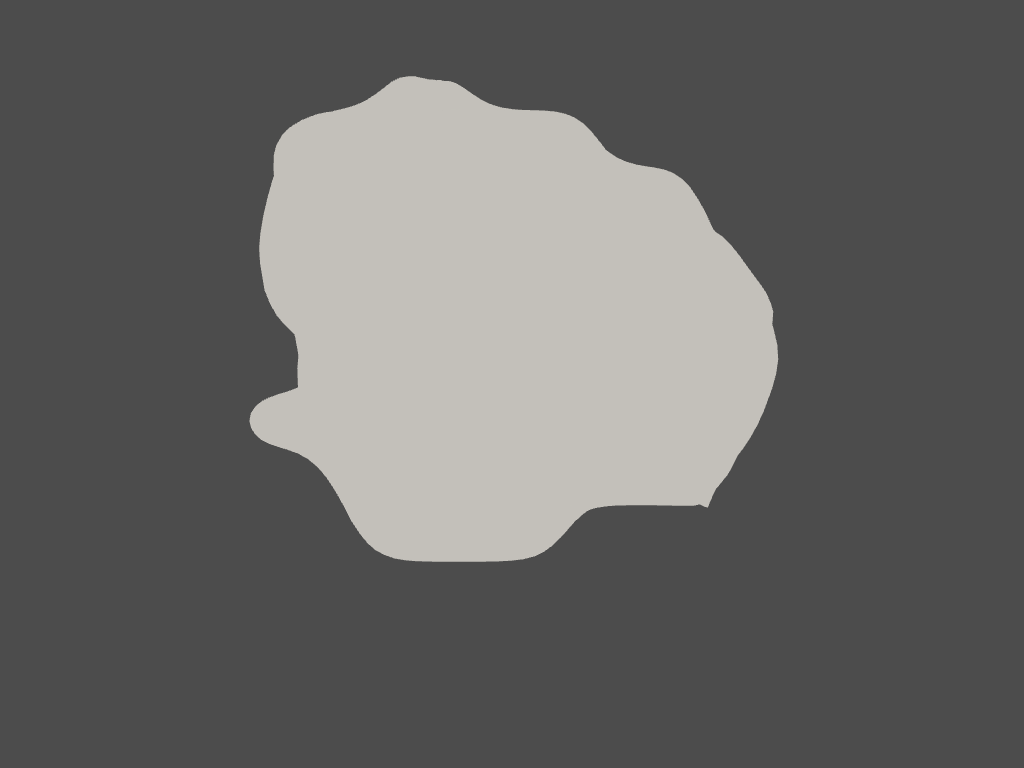

In [6]:
synapse_path = "./paired synapse-vesicle meshes/Synapse 408.stl"
vesicle_path = "./paired synapse-vesicle meshes/Vesicle 631.stl"

synPlot, vesPlot, synImg, vesImg = SynVesPlot(synapse_path, vesicle_path)

In [ ]:
def bm1(mask1, mask2):
    mask1_area = np.count_nonzero( mask1 )
    mask2_area = np.count_nonzero( mask2 )
    intersection = np.count_nonzero( np.logical_and( mask1, mask2 ) )
    iou = intersection/(mask1_area+mask2_area-intersection)
    return iou

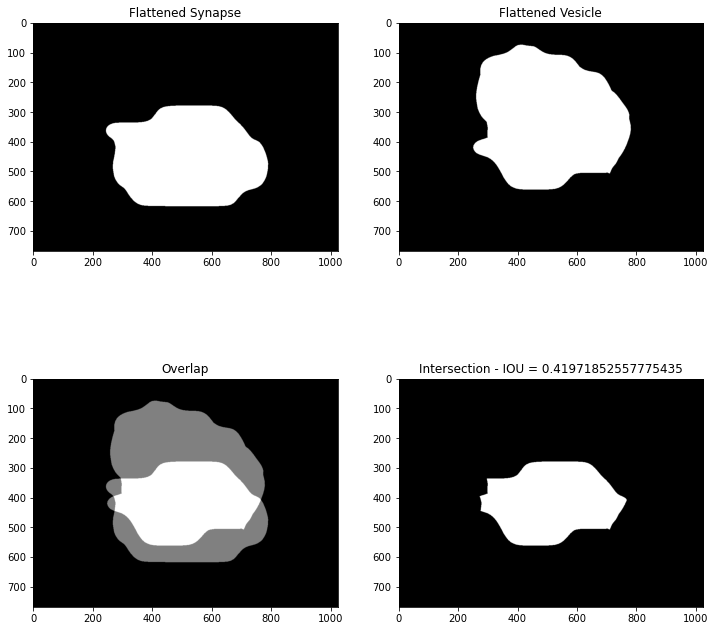

In [43]:
synapseOverlay = cv2.imread(synImg, cv2.IMREAD_GRAYSCALE)
vesicleOverlay = cv2.imread(vesImg, cv2.IMREAD_GRAYSCALE)

thresh=76
syn_bw = cv2.threshold(synapseOverlay, thresh, 255, cv2.THRESH_BINARY)[1]
ves_bw = cv2.threshold(vesicleOverlay, thresh, 255, cv2.THRESH_BINARY)[1]

mergedOverlay = cv2.addWeighted(syn_bw, 0.5, ves_bw, 0.5, 0)
intersection = cv2.threshold(mergedOverlay, 128, 255, cv2.THRESH_BINARY)[1]

IOU = bm1(syn_bw, ves_bw)

fig, ax = plt.subplots(
    nrows=2, ncols=2, figsize = (12,12)
)

ax[0, 0].imshow(syn_bw, 'gray')
ax[0, 0].title.set_text('Flattened Synapse')

ax[0, 1].imshow(ves_bw, 'gray')
ax[0, 1].title.set_text('Flattened Vesicle')

ax[1, 0].imshow(mergedOverlay, 'gray')
ax[1, 0].title.set_text('Overlap')

ax[1, 1].imshow(intersection, 'gray')
ax[1, 1].title.set_text('Intersection - IOU = {}'.format(IOU))

# plt.imshow(dst, 'gray')
# plt.show()

# print(type(syn_bw))

In [33]:
synapse_path = "./paired synapse-vesicle meshes/Synapse 408.stl"
vesicle_path = "./paired synapse-vesicle meshes/Vesicle 631.stl"

sy_reader = pv.get_reader(synapse_path)
ves_reader = pv.get_reader(vesicle_path)

synapse = sy_reader.read()
vesicle = ves_reader.read()

p = pv.Plotter(off_screen=True)

vectors = np.vstack(
    (
        np.sin(synapse.points[:, 0]),
        np.cos(synapse.points[:, 1]),
        np.cos(synapse.points[:, 2]),
    )
).T

synapse["vectors"] = vectors * 0.01
synapse.set_active_vectors("vectors")

normals = synapse.active_normals

print(normals)
'''

# plot just the arrows
# synapse.plot()

p.add_mesh(synapse.arrows, lighting=False, scalar_bar_args={'title': "Vector Magnitude"})
# p.add_mesh(synapse, color="grey", ambient=0.6, opacity=0.5, show_edges=False)
# p.add_mesh(synapse)
p.camera_position = 'xz'
p.camera.SetParallelProjection(True)
p.show()
'''

None


'\n\n# plot just the arrows\n# synapse.plot()\n\np.add_mesh(synapse.arrows, lighting=False, scalar_bar_args={\'title\': "Vector Magnitude"})\n# p.add_mesh(synapse, color="grey", ambient=0.6, opacity=0.5, show_edges=False)\n# p.add_mesh(synapse)\np.camera_position = \'xz\'\np.camera.SetParallelProjection(True)\np.show()\n'

In [ ]:
def SynVesPlot(synapsePath, vesiclePath):

    synapse_name = (synapsePath.split("/")[-1]).split(".")[0] # Parse the filepath strings to get file names
    vesicle_name = (vesiclePath.split("/")[-1]).split(".")[0] # ^^^
    
    syn_reader = pv.get_reader(synapsePath) # Create STL readers for both objects
    ves_reader = pv.get_reader(vesiclePath) # ^^^

    synapse = syn_reader.read() # Use the created readers to read the imported meshes
    vesicle = ves_reader.read() # ^^^

    p = pv.Plotter(off_screen=True) # Create an intial plot for both meshes

    # == SET INITIAL POSITIONS ==
    
    p1 = (synapse.center) # Get the center of each model
    p2 = (vesicle.center) # ^^^

    # == ROTATE MESHES TO BE IN LINE ==

    center = ((p2[0]+p1[0])/2, (p1[1]+p2[1])/2, (p1[2]+p2[2])/2) # Calculate a centerpoint between both models
    circleRad = math.sqrt(pow((p1[0] - center[0]), 2) + pow((p1[1] - center[1]), 2)) # Get the radius of a circle touching each model's center
    p3 = (center[0] - circleRad, center[1]) # Store the desired location of the rotated models
    p4 = (center[0] + circleRad, center[1]) # ^^^

    angle1 = angle(p1, center, p3) # Calculate the angle between the current and desired positions
    angle2 = 180 - angle1 # Mirror this angle for the opposite mesh

    synapseRot = synapse.rotate_z(angle1, center, inplace=True) # Rotate each mesh to the new desried position
    vesicleRot = vesicle.rotate_z(angle1, center, inplace=True) # ^^^

    # == PROJECT TO PLANE ==

    normal = (1, 0, 0) # Rotate the projection plane to align between both models
    syn_projected = synapseRot.project_points_to_plane(origin=center, normal=normal) # Project each model to the plane
    ves_projected = vesicleRot.project_points_to_plane(origin=center, normal=normal) # ^^^

    p.add_mesh(syn_projected, color = 'Blue', show_scalar_bar=False) # Add each projected mesh to the plotter
    p.add_mesh(ves_projected, color = 'Red', show_scalar_bar=False) # ^^^

    # == CAMERA SETTINGS ==
    p.camera_position = 'yz'
    p.camera.SetParallelProjection(True)
    p.camera.focal_point = center
    camScale = p.camera.parallel_scale # Store the camera's Parallel Scale to be used in two individual plotters
    
    # == NEW PLOTS ==
    
    synPlot = pv.Plotter(off_screen=True) # Create new plotters for each mesh
    vesPlot = pv.Plotter(off_screen=True) # ^^^

    synPlot.add_mesh(syn_projected, show_scalar_bar=False) # Plot each projected plane the respective plotter
    vesPlot.add_mesh(ves_projected, show_scalar_bar=False) # ^^^

    # == CAMERA SETTINGS ==
    synPlot.camera_position = 'yz'
    synPlot.camera.SetParallelProjection(True)
    synPlot.camera.focal_point = center
    synPlot.camera.parallel_scale = camScale

    vesPlot.camera_position = 'yz'
    vesPlot.camera.SetParallelProjection(True)
    vesPlot.camera.focal_point = center
    vesPlot.camera.parallel_scale = camScale

    synImgName = '{}.png'.format(synapse_name) # Use the filenames to make names for each screenshot
    vesImgName = '{}.png'.format(vesicle_name) # ^^^

    synPlot.screenshot(synImgName) # Save an image of each projected mesh
    vesPlot.screenshot(vesImgName) # ^^^
    
    cv2.imwrite(synImgName, synPlot.image) # Convert the images for Cv2
    cv2.imwrite(vesImgName, vesPlot.image) # ^^^
    
    synapseOverlay = cv2.imread(synImgName, cv2.IMREAD_GRAYSCALE) # Read the files into Cv2 for thresholding
    vesicleOverlay = cv2.imread(vesImgName, cv2.IMREAD_GRAYSCALE) # ^^^

    thresh=76 # Lightest areas start at 76, so use 76 as the threshold between black and white
    syn_bw = cv2.threshold(synapseOverlay, thresh, 255, cv2.THRESH_BINARY)[1] # Threshold each image to create a binary image
    ves_bw = cv2.threshold(vesicleOverlay, thresh, 255, cv2.THRESH_BINARY)[1] # ^^^

    mergedOverlay = cv2.addWeighted(syn_bw, 0.5, ves_bw, 0.5, 0) # Create an image to display the overlap
    intersection = cv2.threshold(mergedOverlay, 128, 255, cv2.THRESH_BINARY)[1] # Create an image to display the intersection

    IOU = bm1(syn_bw, ves_bw) # Calculate the IOU
    
    fig, ax = plt.subplots(
    nrows=2, ncols=2, figsize = (12,12)
    )

    ax[0, 0].imshow(syn_bw, 'gray')
    ax[0, 0].title.set_text('Flattened Synapse')

    ax[0, 1].imshow(ves_bw, 'gray')
    ax[0, 1].title.set_text('Flattened Vesicle')

    ax[1, 0].imshow(mergedOverlay, 'gray')
    ax[1, 0].title.set_text('Overlap')

    ax[1, 1].imshow(intersection, 'gray')
    ax[1, 1].title.set_text('IOU = {}'.format(IOU))
    
    return(IOU)

In [ ]:
synapse_path = "./paired synapse-vesicle meshes/Synapse 408.stl"
vesicle_path = "./paired synapse-vesicle meshes/Vesicle 631.stl"

# print("IOU =", format(SynVesPlot(synapse_path, vesicle_path)))
SynVesPlot(synapse_path, vesicle_path)